# **菊安酱与菜菜的Python机器学习可视化**

### <font color='bule'>第四期  分布图：26箱型图

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

## **分布图 Distribution**

分布图是python机器学习中比较常见的一种图形    
如果你想要查看多组数据之间的分布有什么不同的时候，分布图就是一个很好的选择。   
你可以用分布图查看一个特征中不同种类之间的分布关系，也可以查看多个特征之间的分布    

典型的分布图有：直方图、密度图、箱型图……

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%88%86%E5%B8%83%E5%9B%BE.png'>

### 我们什么时候需要分布图呢？  
1. 数据探索 & 数据解读：<br>
>探索数据关系，了解数据分布状况，为决策提供依据<br>
2. 数据报告 & 学术研究：<br>
>纵向对比：同一个特征中不同类别之间的分布状况<br>
>横向对比：不同特征之间的分布状况

><img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/%E6%83%8A%E5%8F%B9.PNG" align="center"/>
>注意，图像30所使用的数据集已经完全失效，该数据集虽然是Titanic数据集，但其内容与kaggle所使用的Titanic数据集有巨大的区别，图中所使用的列并不存在于现在网络上能够获取的Titanic数据集中。
>小伙伴们可以自行运行导入的代码，如果可以顺利运行，就可以执行最后一个图。

### <font color=bule> 28/50 小提琴图

小提琴图可以说是与箱线图高度相似的一个图像，不过它看起来更像是概率分布图与箱线图的结合。从小提琴图上，我们既能看出数据的偏正、分布、长尾、坡度等信息，又能看出均值、上分位数下分位数等信息，为了绘制概率密度分布还需要对数据进行分箱（感谢seaborn帮我们自动分了箱）。不过可惜的是，小提琴图虽然很好看，却远远没有箱线图传播得广，读起图来也没有单独的分布图或箱线图容易（因为含有太多信息了，是不是感觉聪明反被聪明误呢？），因此在实际环境中我们很少见到使用小提琴图的情况。

<img src='https://www.machinelearningplus.com/wp-content/uploads/2018/11/28_Violin_Plot_Seaborn-min.png'>

### 1. 导入需要的模块和库 

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2.导入数据，认识数据

In [9]:
#导入数据，由于源数据直接从github导入的连接已失效，大家可以把以下路径更换成自己的地址
df = pd.read_csv(r"C:\work\CDA时期\micro-class\virtuliazation\Python50图 完整版课件\data\data\mpg_ggplot2.csv")

In [ ]:
#这是我们经常见到的ggplot2汽车数据集，在之前的课程中我们多次使用这个数据集，大家应该非常熟悉了

In [12]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用每加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [19]:
[*zip(df.columns.values,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

### 3. 认识绘制小提琴图的函数

#### sns.violinplot

> **重要参数**  
>> **scale**：缩放每张小提琴图的宽度，可以填写"area"、"count"以及"width"三个选项。area表示每张小提琴图具有相同的面积。count会让小提琴的宽度会根据分箱中观察点的数量进行缩放。填写width则会让每张小提琴图具有相同的宽度。<br>
<br>
>> **inner**：控制小提琴图内部数据点的表示，可以填写"box", "quartile", "point", "stick", None五个选项。填写box，则绘制一个微型箱型图。填写quartiles，则显示四分位数线。填写point或stick，则显示具体数据点或数据线。使用None则绘制不加修饰的小提琴图。

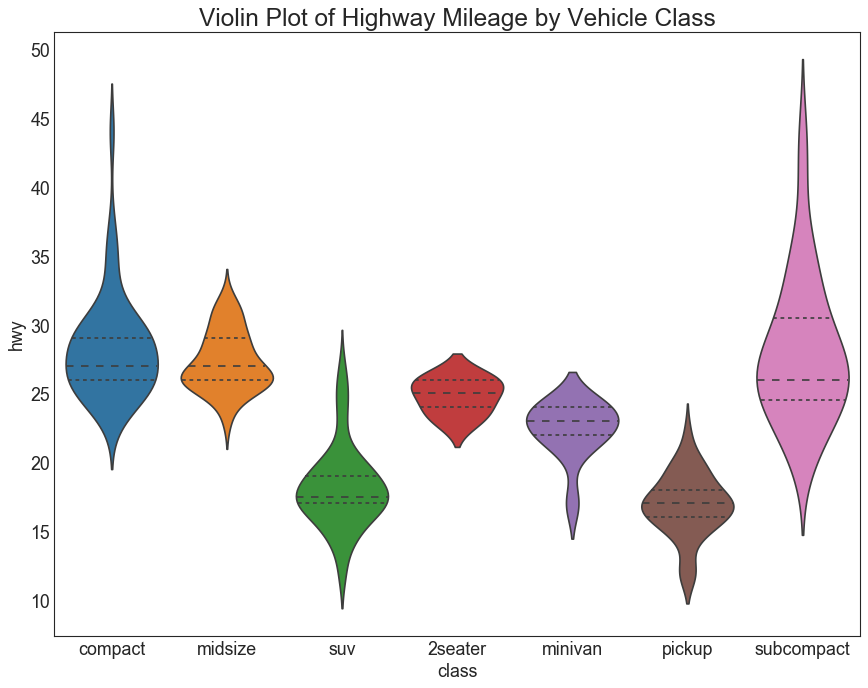

In [21]:
#绘制图像
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class' #横坐标是车辆种类
               , y='hwy' #纵坐标是公路里程/加仑
               , data=df
               , scale='width' #在这里我们让每张小提琴保持同样的宽度
               , inner='quartile' #显示四分位数线，你可以试着更换这些参数的取值来观察不同状态下的小提琴图
              )

#装饰图像
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

### <font color=bule> 29/50 人口金字塔图

人口金字塔可用于显示按量级（如数量或体积）排序的数据组的分布，它与互联网中常用的漏斗图非常相似，经常被用来表示人口或流量的逐步过滤过程。这次我们所绘制的金字塔图是从大到小，用以展示有多少人通过营销渠道的每个阶段。（实际上更合适的方法是绘制反向的人口金字塔图，就和漏斗图类似）

<img src='https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/vizualization/week4/29_PyramidPlot_Matplotlib-min.png?Expires=1610290553&OSSAccessKeyId=TMP.3KjZL5pC6A9Gtyj4pX1PxaM9KWVgZ5eyVfy1pwBxcnpBSFDwhCU1FVoHt3aXq8nVQc5G6w4gze2dxRusi78RkfResuSku9&Signature=mMUHwDRTP2NBnaQG4uRY419BUdo%3D&versionId=CAEQEhiBgIC80qmytxciIDEzYTY4MDJkMThjODQ4Y2FiOTkxOWIzMDI1ZmYxODg4&response-content-type=application%2Foctet-stream'>

### 1. 导入需要的模块和库

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据、解读数据

In [26]:
# 导入数据，由于源数据直接从github导入的连接已失效，大家可以把以下路径更换成自己的地址
df = pd.read_csv(r"C:\work\CDA时期\micro-class\virtuliazation\Python50图 完整版课件\data\data\email_campaign_funnel.csv")

In [29]:
df.shape

(42, 3)

In [30]:
df #可以看出，这是一个有18个步骤的运营流程，按性别分成两部分

,Stage,Gender,Users
0,Stage 01: Browsers,Male,-1.492762e+07
1,Stage 02: Unbounced Users,Male,-1.286266e+07
2,Stage 03: Email Signups,Male,-1.136190e+07
3,Stage 04: Email Confirmed,Male,-9.411708e+06
4,Stage 05: Campaign-Email Opens,Male,-8.074317e+06
5,Stage 06: Campaign-Email Clickthroughs,Male,-6.958512e+06
6,Stage 07: Buy Button Page,Male,-6.045363e+06
7,Stage 08: Buy Button Clickers,Male,-5.029954e+06
8,Stage 09: Cart Confirmation Page,Male,-4.008034e+06
9,Stage 10: Address Verification Page,Male,-3.172555e+06


### 3. 绘制图像

In [33]:
#绘制图像，首先设置画布
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender' #设置用来分组的列名
order_of_bars = df.Stage.unique()[::-1] #使用负索引的方式对数据进行一个排序

<Figure size 1040x800 with 0 Axes>

In [34]:
order_of_bars #让数据从流程18倒数到流程1

array(['Stage 18: 5th Purchase', 'Stage 17: 4th Purchase',
       'Stage 16: 3rd Purchase', 'Stage 15: 2nd Purchase',
       'Stage 14: 1st Successful Purchase',
       'Stage 13: Payment Successful', 'Stage 12: Payment',
       'Stage 11: Submit Order Page',
       'Stage 10: Address Verification Page',
       'Stage 09: Cart Confirmation Page',
       'Stage 08: Buy Button Clickers', 'Stage 07: Buy Button Page',
       'Stage 06: Campaign-Email Clickthroughs',
       'Stage 05: Campaign-Email Opens', 'Stage 04: Email Confirmed',
       'Stage 03: Email Signups', 'Stage 02: Unbounced Users',
       'Stage 01: Browsers'], dtype=object)

In [37]:
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]
#使用我们熟悉的方式取出颜色，这个颜色是区分性别用的，因此我们在这里使用的初始数字是len(df[group_col].unique())

In [35]:
len(df[group_col].unique())

2

In [ ]:
#接下来我们循环绘图，虽然金字塔图看起来酷炫，但实际上它就是一系列条形图barchart的排列，所以我们所使用的函数就是barplot，只不过现在我们的x是值，y是类别（和一般的条形图相反）
#但需要注意的是，我们循环的是“男”、“女”和分别对应男女的颜色，而不是在18个流程中循环

In [39]:
df.head()

,Stage,Gender,Users
0,Stage 01: Browsers,Male,-1.492762e+07
1,Stage 02: Unbounced Users,Male,-1.286266e+07
2,Stage 03: Email Signups,Male,-1.136190e+07
3,Stage 04: Email Confirmed,Male,-9.411708e+06
4,Stage 05: Campaign-Email Opens,Male,-8.074317e+06


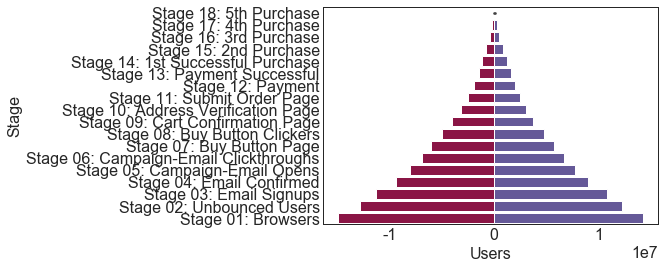

In [40]:
for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage' #输入横纵坐标，现在横坐标是User，也就是条形图的长度，纵坐标是类别，也就是我们的运营流程
                , data=df.loc[df[group_col]==group, :] #数据是性别那一列等于男或女的全部数据
                , order=order_of_bars #这是条形图的顺序，顺序是我们之前就排好的顺序
                , color=c #颜色为之前就取出来的c
                , label=group #label图形的图例
               )

In [ ]:
# 最后再装饰一下 
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

### 3.最终将所有的代码混合起来

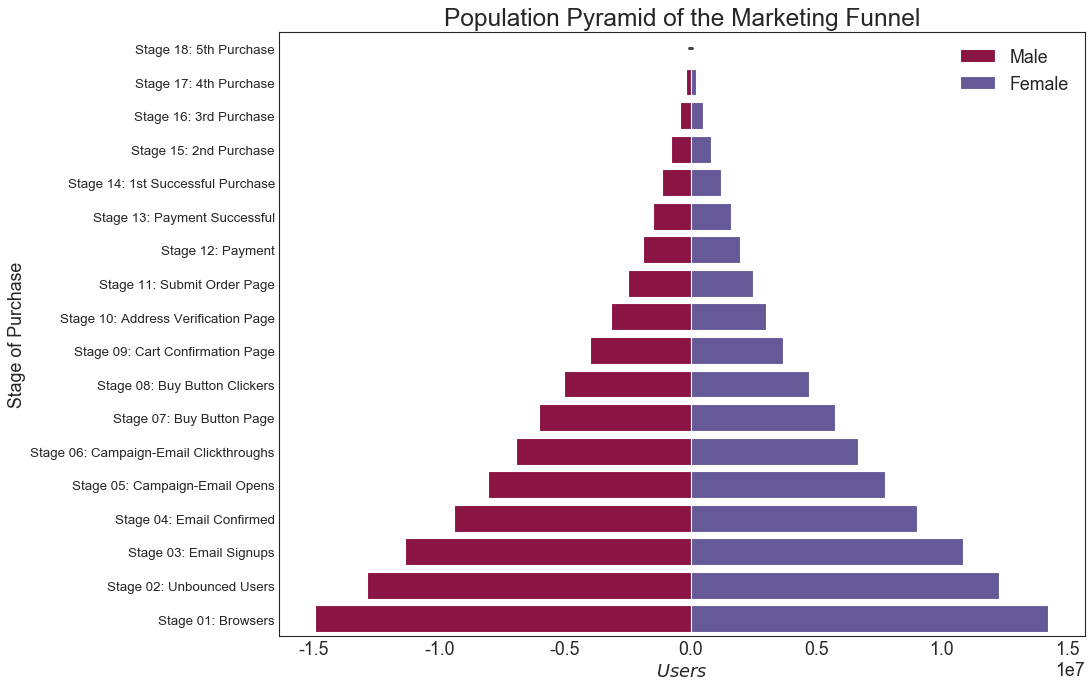

In [41]:
# 绘制图像
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# 装饰
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

对于互联网用户而言，或许将顺序倒过来才是更好的变现方式：

In [51]:
order_of_bars2 = df.Stage.unique()[::-1].tolist()

In [52]:
order_of_bars2.reverse()

In [53]:
order_of_bars2

['Stage 01: Browsers',
 'Stage 02: Unbounced Users',
 'Stage 03: Email Signups',
 'Stage 04: Email Confirmed',
 'Stage 05: Campaign-Email Opens',
 'Stage 06: Campaign-Email Clickthroughs',
 'Stage 07: Buy Button Page',
 'Stage 08: Buy Button Clickers',
 'Stage 09: Cart Confirmation Page',
 'Stage 10: Address Verification Page',
 'Stage 11: Submit Order Page',
 'Stage 12: Payment',
 'Stage 13: Payment Successful',
 'Stage 14: 1st Successful Purchase',
 'Stage 15: 2nd Purchase',
 'Stage 16: 3rd Purchase',
 'Stage 17: 4th Purchase',
 'Stage 18: 5th Purchase']

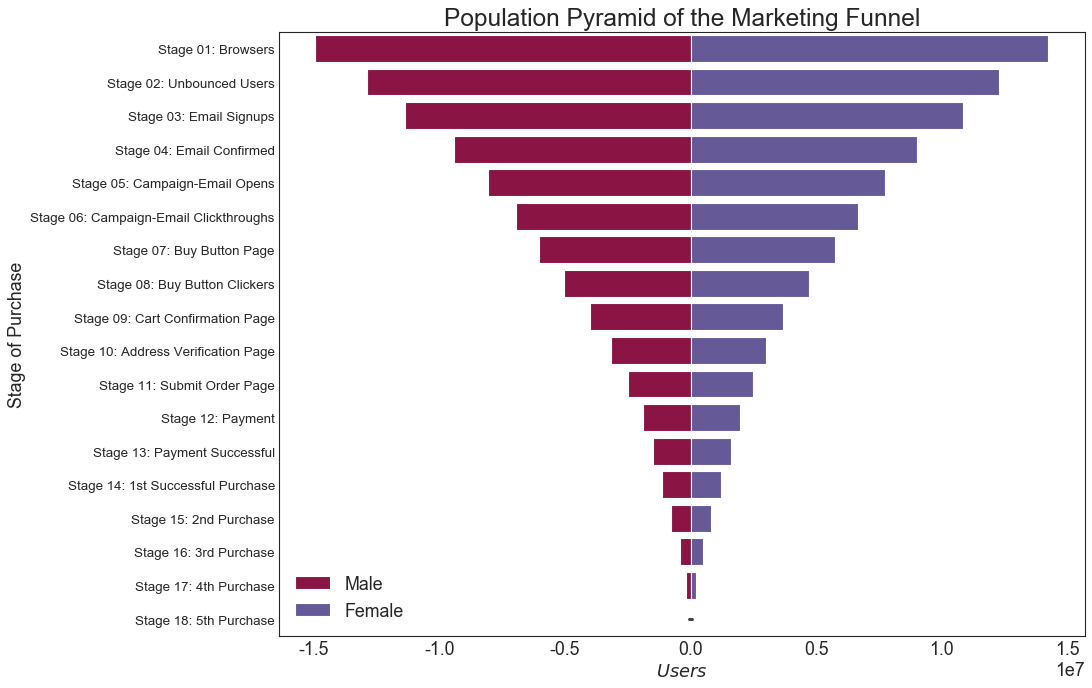

In [54]:
# 绘制图像
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars2 = df.Stage.unique()[::-1].tolist()
order_of_bars2.reverse()
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars2, color=c, label=group)

# 装饰
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

这样看起来更像是我们理解中的漏斗图，从流程1到流程18，留下的用户越来越少。不过这个数据明显没有真实参考价值，因为两个性别的漏斗趋势明显一模一样。不过大家可以使用这样的方式绘图。

### <font color=bule> 30/50 分类图

seaborn库提供的分类图可用于可视化两个或更多个分类变量彼此之间的计数分布。

<img src='https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/vizualization/week4/04%20%E5%88%86%E5%B8%83%E5%9B%BE%E6%9C%80%E5%90%8E.png?Expires=1610296813&OSSAccessKeyId=TMP.3KjZL5pC6A9Gtyj4pX1PxaM9KWVgZ5eyVfy1pwBxcnpBSFDwhCU1FVoHt3aXq8nVQc5G6w4gze2dxRusi78RkfResuSku9&Signature=guFFsqwBkbcLF6WY3%2FqFcD2zeos%3D&versionId=CAEQEhiBgMDc4uiztxciIDYzOTlhYTI1MjExNDQ4NzNhNTQ5ZGMxYWM4YmI3OGM4&response-content-type=application%2Foctet-stream'>

### 1. 导入需要的模块和库

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据、解读数据

In [ ]:
#titanic = sns.load_dataset("titanic")

In [ ]:
#titanic数据集已经失效，在这里我们使用kaggle中的数据集并更换绘图的列

In [67]:
titanic = pd.read_csv(r"C:\work\CDA时期\micro-class\virtuliazation\Python50图 完整版课件\data\data\Titanic.csv")

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. 绘图

首先我们绘制的是不同舱门的生存情况的分布图

<Figure size 72x216 with 0 Axes>

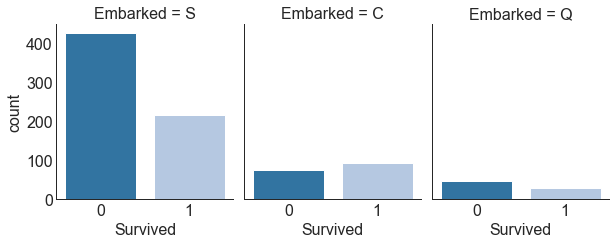

In [84]:
#绘图
fig = plt.figure(figsize=(1,3))
g = sns.catplot("Survived"
                ,col="Embarked"
                ,data=titanic[titanic.Embarked.notnull()] #首先输入横纵坐标和数据
                ,kind="count" #以计数的方式进行聚合
                ,height=3.5
                ,aspect=.8
                ,palette='tab20'
               )
fig.suptitle('sf')
plt.show();

In [ ]:
#使用小提琴图，在同样的图中展示更多的信息

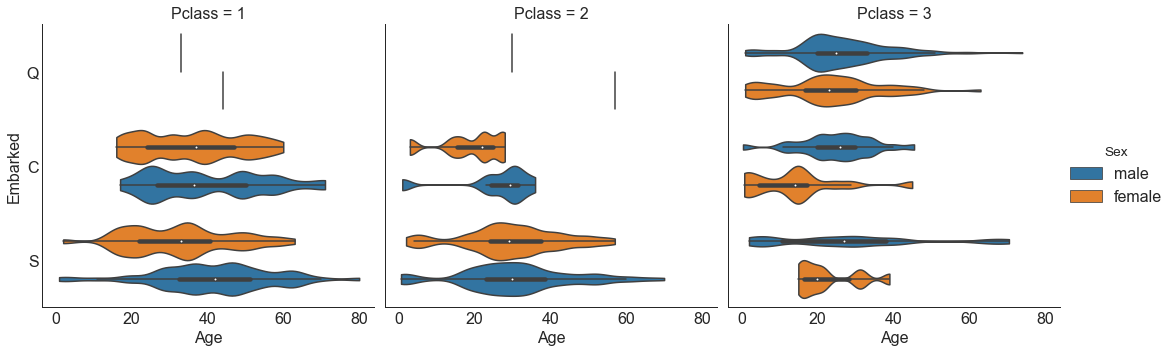

In [94]:
#绘图
sns.catplot(x="Age"
            , y="Embarked"
            , hue="Sex" #性别作为第三维度
            , col="Pclass"
            , data=titanic[titanic.Embarked.notnull()] #数据
            , orient="h" #图像的方向，可以选择h或者r，在这里我们选择的是h
            , height=5
            , palette="tab10" #颜色
            , kind="violin" #图像的展示形式：小提琴图
            , cut=0 #消除小提琴图两端的尖
            , bw=.2
           );